In [1]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from pycocotools.coco import COCO
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import torchvision.models.detection as detection

In [2]:
# Device configuration (GPU if available)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

class_names = {
    0: "background",  
    1: "Atopic Dermatitis",
    2: "Eczema",
    3: "Melanoma",
    4: "Psoriasis",
    5: "Tinea Ringworm Candidiasis",
    6: " Vascular lesion"
}

In [3]:
# Function to process and display predictions on the uploaded image
def process_image_and_predict(image_path, model, device):
    image = Image.open(image_path).convert("RGB")

    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    
    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Set the model to evaluation mode and get predictions
    model.eval()
    with torch.no_grad():
        predictions = model(image_tensor)

    # Extract the predicted bounding boxes, labels, and scores
    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Filter predictions based on a confidence threshold (e.g., 0.5)
    threshold = 0.5
    filtered_boxes = boxes[scores > threshold]
    filtered_labels = labels[scores > threshold]
    filtered_scores = scores[scores > threshold]

    # Draw bounding boxes on the image
    draw = ImageDraw.Draw(image)
    for box, label, score in zip(filtered_boxes, filtered_labels, filtered_scores):
        xmin, ymin, xmax, ymax = box

        # Get the class name for the label
        class_name = class_names.get(label, "Unknown Class")

        # Draw the bounding box
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)

        # Draw the label and score text
        text = f"{class_name}: Score {score:.2f}"
        draw.text((xmin, ymin), text, fill="red")

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
# Function to upload and test a random image
def upload_and_test_image(image_path):
    print(f"Processing image: {image_path}")
    process_image_and_predict(image_path, model, device)

In [5]:
num_classes = 7 
model = detection.ssd300_vgg16(weights=detection.SSD300_VGG16_Weights.COCO_V1)

# Modify the number of output classes by modifying the classification head
model.head.classification_head.num_classes = num_classes

# Load the trained model
model.load_state_dict(torch.load("ssd_skin_disease.pth"))
model.to(device)

C:\Users\Ankit Rajput\AppData\Local\Temp\ipykernel_19500\2323641759.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("ssd_skin_disease.pt

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

Processing image: testimg.jpg


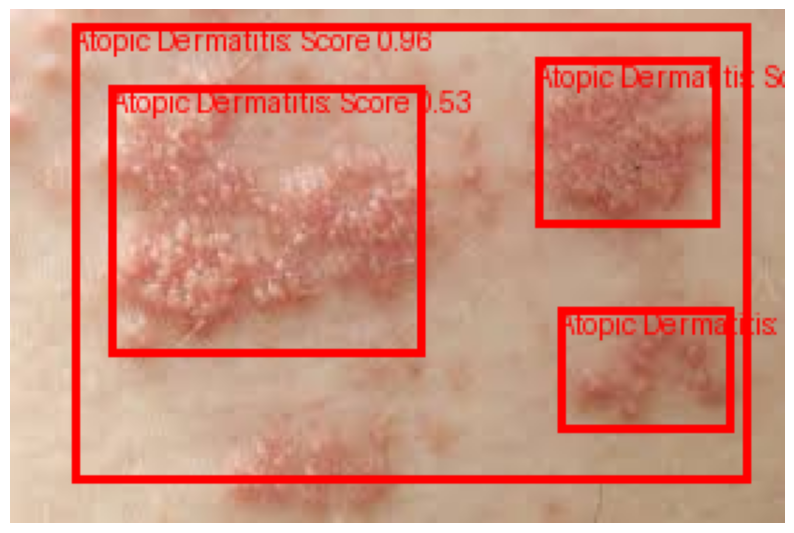

In [6]:
# Example usage: Test a random image
# Replace with the path of the image you want to test
image_path = "testimg.jpg"
upload_and_test_image(image_path)

Processing image: testimg1.jpg


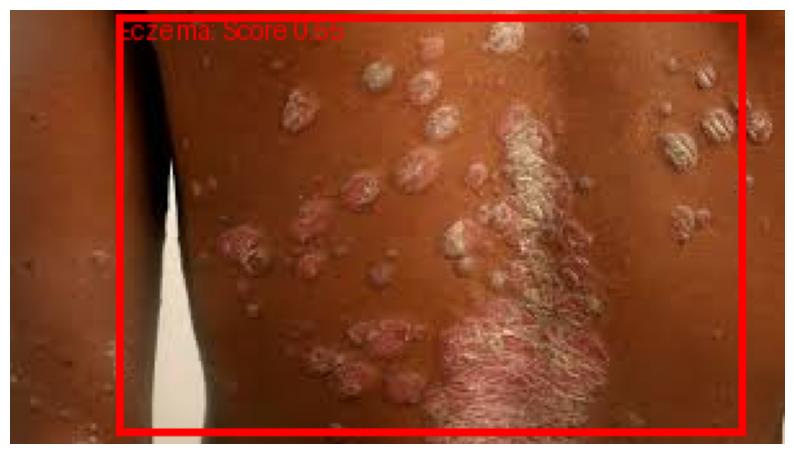

In [7]:
image_path = "testimg1.jpg"
upload_and_test_image(image_path)

Processing image: testimg2.jpg


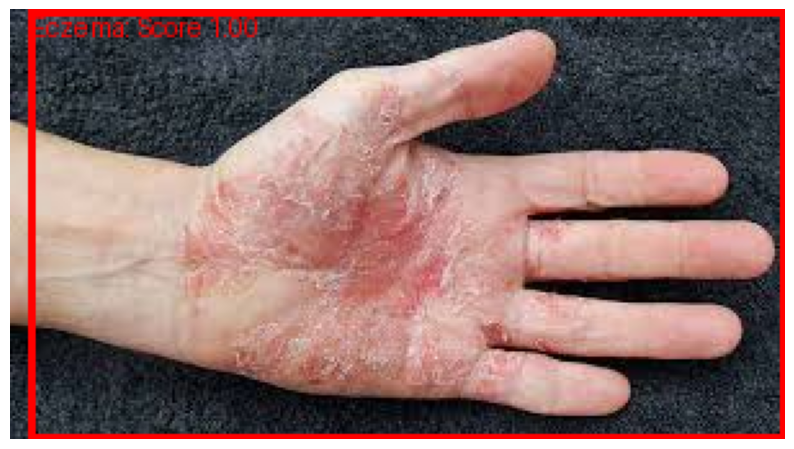

In [9]:
image_path = "testimg2.jpg"
upload_and_test_image(image_path)